<a href="https://colab.research.google.com/github/marquinho89/playbooks/blob/master/proyectofinal_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata

# Replace 'YOUR_SECRET_NAME' with the name you gave your secret in the secrets manager
github_token = userdata.get('GithubToken')

# Now you can use the github_token variable in your git clone command
!git clone https://{github_token}@github.com/marquinho89/bot-mch-learn.git

Cloning into 'bot-mch-learn'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 4), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 32.33 KiB | 1.47 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
pwd

'/content'

In [ ]:
log_hua = '/content/bot-mch-learn/hua_log.log'

try:
    with open(log_hua, 'r', encoding='utf-8') as file:
        file_content = file.read()
    print("File content successfully read into the 'file_content' variable.")
except FileNotFoundError:
    print(f"Error: The file '{log_hua}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File content successfully read into the 'file_content' variable.


In [ ]:
#Miramos el archivo de logs que importamos.
print(file_content[:1006])

Jul  24 2025 00:02:45-03:00 REGXCOE-SLF001 %%01INFO/4/IM_LOGFILE_AGING_DELETE(l):CID=0x80600403;One log file was deleted due to aging. (LogFileName=1#flash:/logfile/pads/pads_1_20250720184548.pads.zip)
Jul  24 2025 00:30:18-03:00 REGXCOE-BLF001 %%01INFO/4/IM_LOGFILE_AGING_DELETE(l):CID=0x80600413;One log file was deleted due to aging. (LogFileName=1#flash:/logfile/diaglog_1_20250426010812.log.zip)
Jul  24 2025 00:34:29-03:00 NACCHOR-SLF006 %%01INFO/4/IM_LOGFILE_AGING_DELETE(l):CID=0x80600403;One log file was deleted due to aging. (LogFileName=1#flash:/logfile/pads/pads_1_20250720131349.pads.zip)
Jul  24 2025 00:52:45-03:00 REGTBUA-BLF001 %%01INFO/4/IM_LOGFILE_AGING_DELETE(l):CID=0x80600413;One log file was deleted due to aging. (LogFileName=1#flash:/logfile/pads/pads_1_20250717172900.pads.zip)
Jul  24 2025 00:55:57-03:00 REGTBUA-SLF001 %%01INFO/4/IM_LOGFILE_AGING_DELETE(l):CID=0x80600403;One log file was deleted due to aging. (LogFileName=1#flash:/logfile/pads/pads_1_20250720060959.pad

In [ ]:
import pandas as pd
import re

def parse_log_line(line):
    regex = (
        r"(?P<timestamp>\w+\s+\d+\s+\d+\s+\d+:\d+:\d+-\d+:\d+)\s+"
        r"(?P<host>\S+)\s+"
        r"(?P<event_type>%%\S+):"
        r"(?P<cid>CID=0x[0-9A-Fa-f]+);"
        r"(?P<message>[^()]+)"
        r"(?:\s+\((?P<details>.+?)\))?"
    )
    match = re.match(regex, line)
    return match.groupdict() if match else None

parsed_logs = []
with open(log_hua, encoding="utf-8", errors="ignore") as f:
    for line in f:
        parsed = parse_log_line(line.strip())
        if parsed:
            parsed_logs.append(parsed)

df = pd.DataFrame(parsed_logs)
df.head()

,timestamp,host,event_type,cid,message,details
0,Jul 24 2025 00:02:45-03:00,REGXCOE-SLF001,%%01INFO/4/IM_LOGFILE_AGING_DELETE(l),CID=0x80600403,One log file was deleted due to aging.,None
1,Jul 24 2025 00:30:18-03:00,REGXCOE-BLF001,%%01INFO/4/IM_LOGFILE_AGING_DELETE(l),CID=0x80600413,One log file was deleted due to aging.,None
2,Jul 24 2025 00:34:29-03:00,NACCHOR-SLF006,%%01INFO/4/IM_LOGFILE_AGING_DELETE(l),CID=0x80600403,One log file was deleted due to aging.,None
3,Jul 24 2025 00:52:45-03:00,REGTBUA-BLF001,%%01INFO/4/IM_LOGFILE_AGING_DELETE(l),CID=0x80600413,One log file was deleted due to aging.,None
4,Jul 24 2025 00:55:57-03:00,REGTBUA-SLF001,%%01INFO/4/IM_LOGFILE_AGING_DELETE(l),CID=0x80600403,One log file was deleted due to aging.,None


In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [ ]:
print("Eventos por host:")
print(df['host'].value_counts().head(5))
print("\nEventos por tipo:")
print(df['event_type'].value_counts().head(5))
print("\nEventos por CID:")
print(df['cid'].value_counts().head(5))

Eventos por host:
host
REGTBUA-BLF001    19
REGTBUA-SLF001    19
REGTBUA-SPN002    19
REGTBUA-BLF002    19
REGTBUA-SLF002    19
Name: count, dtype: int64

Eventos por tipo:
event_type
%%01SNMP/4/SNMP_MIB_SET(s)                              312
%%01INFO/4/IM_LOGFILE_AGING_DELETE(l)                   172
%%01CONFIGURATION/4/CONFIGMIB_FILE_OPERATE_FINISH(l)    156
%%01INFO/4/IM_SECURITY_LOGFILE_AGING_DELETE(s)            5
Name: count, dtype: int64

Eventos por CID:
cid
CID=0x80cb000c    156
CID=0x80d50415    148
CID=0x80d50405    140
CID=0x80600403     92
CID=0x80600413     73
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

df['host_encoded'] = LabelEncoder().fit_transform(df['host'])
df['cid_encoded'] = LabelEncoder().fit_transform(df['cid'])

tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['message'])

In [ ]:
from sklearn.ensemble import IsolationForest
from scipy.sparse import hstack
import numpy as np

X = hstack([
    tfidf_matrix,
    np.array(df['host_encoded']).reshape(-1, 1),
    np.array(df['cid_encoded']).reshape(-1, 1)
])

model = IsolationForest(random_state=42, contamination=0.01)
df['anomaly_score'] = model.fit_predict(X)

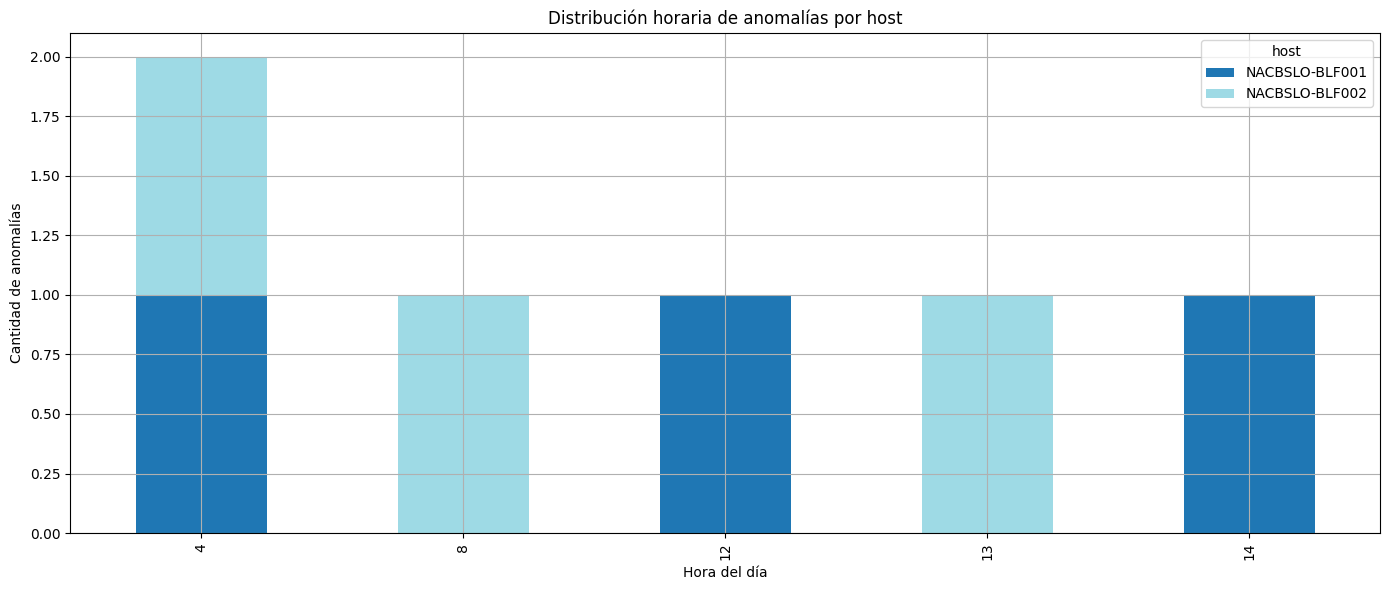

In [ ]:
import matplotlib.pyplot as plt

df['hour'] = df['timestamp_dt'].dt.hour
pivot = df[df['anomaly_score'] == -1].pivot_table(index='hour', columns='host', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Distribución horaria de anomalías por host")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de anomalías")
plt.grid(True)
plt.tight_layout()
plt.show()

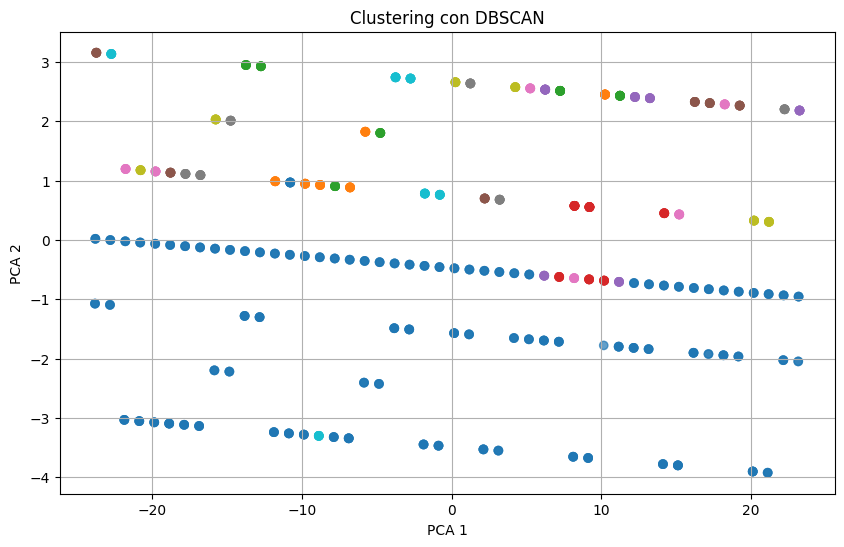

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan_model.fit_predict(X_reduced)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['dbscan_cluster'], cmap='tab10', alpha=0.7)
plt.title("Clustering con DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

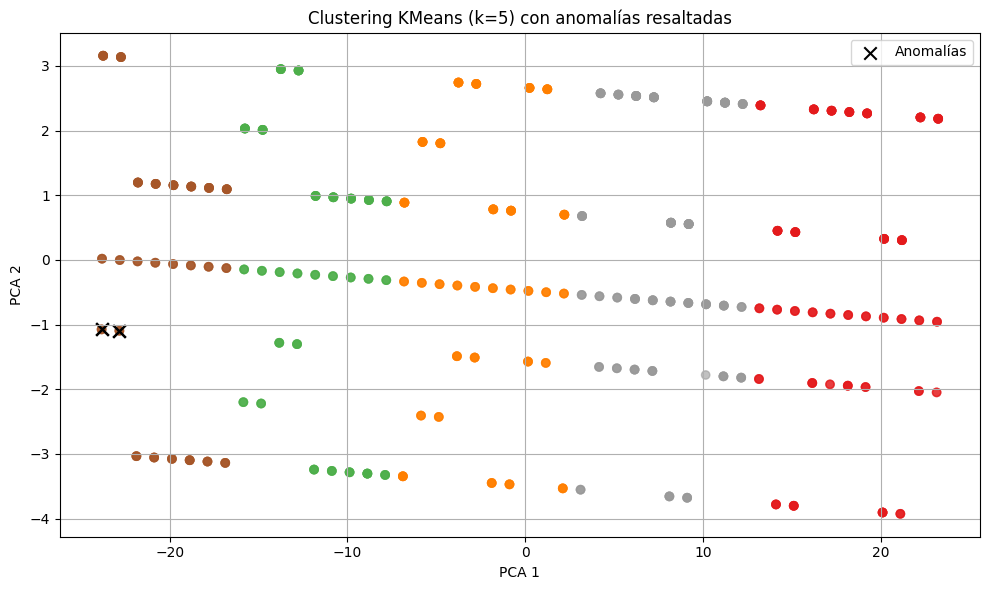

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans_model.fit_predict(X_reduced)

is_anomaly = df['anomaly_score'] == -1

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['kmeans_cluster'], cmap='Set1', alpha=0.6)
plt.scatter(X_reduced[is_anomaly, 0], X_reduced[is_anomaly, 1], color='black', marker='x', s=80, label='Anomalías')
plt.legend()
plt.title("Clustering KMeans (k=5) con anomalías resaltadas")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
# Exportar resultados
df.to_csv("logs_analizados_con_clusters.csv", index=False)
files.download("logs_analizados_con_clusters.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>